In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re
from scipy.integrate import cumulative_trapezoid

# 1x3 scatter plots of RF regression results

In [30]:
s1_unit = 'dB'
second_stat = 'max'

metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'
metrics_multi_dir = 'output/rf_metrics/multi_date'
predict_multi_dir = 'output/rf_predictions/multi_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))


for i in range(len(metrics_0219)):#[26:28]:
    # if '_10m_' in metrics_0219[i]:
    #     continue
    # Check to ensure file names line up
    target = metrics_0219[i].split('.')[0].split('/')[-1]
    if '0219' in target: 
        target = target.split('0219_')[-1]
    found_0302 = bool(re.findall(target, metrics_0302[i]))
    found_multi = bool(re.findall(target, metrics_multi[i]))
    if not (found_0302 & found_multi):
        print('Filenames not aligned!!')
        break
    # Continue after check
    files_0219 = (metrics_0219[i], predict_0219[i])
    files_0302 = (metrics_0302[i], predict_0302[i])
    files_multi = (metrics_multi[i], predict_multi[i])
    title_prefix = ['Feb 18: ', 'Mar 2: ', 'Both dates: ']
    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    j = 0
    for date in [files_0219, files_0302, files_multi]:
        mf = date[0]
        pf = date[1]
        # Set up dataframes
        metrics_df = pd.read_csv(mf, index_col=0)
        metrics_df.index.name = 'run_no'
        predict_df = pd.read_csv(pf, index_col=0)
        predict_df['run_no'] = predict_df['run_no'].astype(int)
        predict_df.index.name = 'sample'
        predict_df.index = predict_df.index % len(predict_df)//100 # reset sample count for each run
        predict_df.index = pd.MultiIndex.from_arrays([predict_df['run_no'], predict_df.index])
        predict_df.drop(columns='run_no', inplace=True)

        # Loop through runs for scatter plot
        
        ax[j].scatter(predict_df['predict'], predict_df['valid'], s=2, marker='.', color='k')
        ax[j].set_xlim(ax[j].get_ylim())
        # ax[j].set_xticks(ax[j].get_yticks())
        ax[j].tick_params(axis='x', labelrotation=90)
        # ax[j].set_xlim(ax[j].get_ylim())
        ax[j].set_xlabel('Measured', fontsize=18, labelpad=12)
        
        ax[j].set_title(f'{title_prefix[j]}R$^2$ = {str(round(metrics_df["r2"].mean(), 2))} MAPE = {str(round(metrics_df["mape"].mean(), 1))}%', fontsize=20)

        j += 1

        # hbin = ax[1].hexbin(predict_df['predict'], predict_df['valid'], cmap='viridis',
        #                     gridsize=50,
        #                     extent=(ax[0].get_xlim()[0], ax[0].get_xlim()[1], ax[0].get_ylim()[0], ax[0].get_ylim()[1]))
        # cbar = plt.colorbar(hbin, ax=ax[1])
        # ax[1].set_xlim(ax[0].get_xlim())
        # ax[1].set_ylim(ax[0].get_ylim())

    xmin, xmax = ax[0].get_xlim()
    ymin, ymax = ax[0].get_ylim()
    for axx in (ax[1], ax[2]):
        x0, x1 = axx.get_xlim()
        if x0 < xmin:
            xmin = x0
        if x1 > xmax:
            xmax = x1
        y0, y1 = axx.get_ylim()
        if y0 < ymin:
            ymin = y0
        if y1 > ymax:
            ymax = y1
    for axx in ax.flatten():
        axx.set_xlim(xmin, xmax)
        axx.set_ylim(ymin, ymax)
        axx.plot((axx.get_xlim()), (axx.get_ylim()), 'r--')
    
    ax[0].set_ylabel('Predicted', fontsize=18, labelpad=12)
    # check for specified scale in filename
    if not re.findall(r'_\d{1,2}[a-z]{1,2}_', mf):
        # Scale not specified (10m pixels)
        fig.suptitle('RF target: 10 m ' + mf.split('_dB_')[-1][:-4], fontsize=22)
    else:
        fig.suptitle('RF target: ' + mf.split('_dB_')[-1][:-4], fontsize=22)
    
    
    fig.tight_layout()
    fig_fname = f"output/figures/scatter/{mf.split('/')[-1].split('.')[0]}.png"
    fig.savefig(fig_fname, dpi=300, facecolor='white')
    plt.close('all')

output/rf_metrics/single_date/0219/func_test_dB_zonal_0219_5m_p95_min.csv output/rf_metrics/single_date/0302/func_test_dB_zonal_0304_5m_p95_min.csv output/rf_metrics/multi_date/func_test_dB_zonal_5m_p95_min.csv


In [27]:
for f in metrics_0302:
    target = f.split('.')[0].split('/')[-1]
    if '0304' in target:
        target = target.split('0304_')[-1]
    if '0219' in target:
        target = target.split('0219_')[-1]
    found = sum([bool(re.findall(target, g)) for g in metrics_0219])
    if not found:
        print(f)

print(len(metrics_0219), len(metrics_0302), len(metrics_multi))

bool  (True & ~False)


95 95 95


True

In [63]:
# Rename 0304 25cm files once and for all!

import os

for f in metrics_0302:
    target = f.split('.')[0].split('/')[-1]
    if '_1_' in target:
        pieces = target.split('_1_')
        new_f = f.split('func')[0] +  pieces[0] + '_' + pieces[1]
        # print(new_f)
        os.rename(f, new_f)
        

# Heatmaps of r^2 results

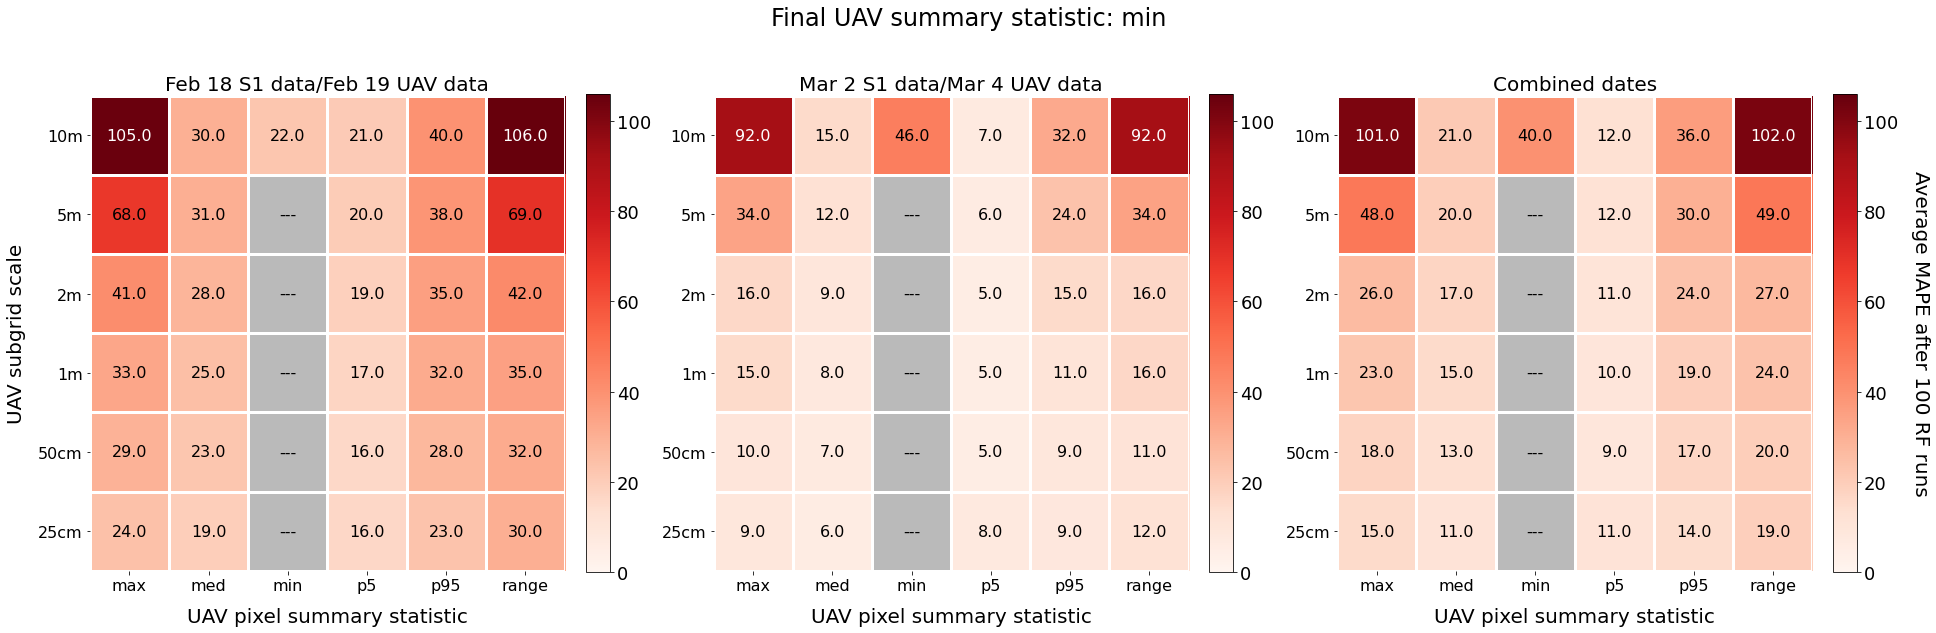

In [14]:
s1_unit = 'dB'
second_stat = 'min'
plot_metric = 'mape'

metrics_dir = 'output/rf_metrics/single_date'
predict_dir = 'output/rf_predictions/single_date'
metrics_multi_dir = 'output/rf_metrics/multi_date'
predict_multi_dir = 'output/rf_predictions/multi_date'

metrics_0219 = sorted(glob(f'{metrics_dir}/0219/*{s1_unit}*.csv'))
predict_0219 = sorted(glob(f'{predict_dir}/0219/*{s1_unit}*.csv'))
metrics_0302 = sorted(glob(f'{metrics_dir}/0302/*{s1_unit}*.csv'))
predict_0302 = sorted(glob(f'{predict_dir}/0302/*{s1_unit}*.csv'))
metrics_multi = sorted(glob(f'{metrics_multi_dir}/*{s1_unit}*.csv'))
predict_multi = sorted(glob(f'{predict_multi_dir}/*{s1_unit}*.csv'))

zonal_0219 = [f for f in metrics_0219 if 'zonal' in f]
zonal_0302 = [f for f in metrics_0302 if 'zonal' in f]
subset_0219 = [f for f in zonal_0219 if second_stat in f.split('.')[0].split('_')[-1]]
subset_0302 = [f for f in zonal_0302 if second_stat in f.split('.')[0].split('_')[-1]]

ind = ['10m','5m','2m','1m','50cm','25cm']
cols = ['max','med','min','p5','p95','range']
df_0219 = pd.DataFrame(index=ind, columns=cols, dtype=float)
df_0302 = pd.DataFrame(index=ind, columns=cols, dtype=float)
df_multi = pd.DataFrame(index=ind, columns=cols, dtype=float)

# Add in 10m filenames
files_10m_0219 = [f'{metrics_dir}/0219/func_test_{s1_unit}_zonal_0219_10m_{i}.csv' for i in cols]
files_10m_0302 = [f'{metrics_dir}/0302/func_test_{s1_unit}_zonal_0304_10m_{i}.csv' for i in cols]
subset_0219 = files_10m_0219 + subset_0219
subset_0302 = files_10m_0302 + subset_0302


def single_to_multi(s):
    parts = s.split(re.findall(r'_\d{4}', s)[0])
    full = parts[0] + parts[1]
    full = full.replace(re.findall(r'/\d{4}', full)[0], '')
    full = full.replace('single', 'multi')
    return full

subset_multi = [single_to_multi(f) for f in subset_0219]


for f0219, f0302, fmulti in zip(subset_0219, subset_0302, subset_multi):
    data_0219 = pd.read_csv(f0219, index_col=0, na_values=['inf'])
    data_0302 = pd.read_csv(f0302, index_col=0, na_values=['inf'])
    data_multi = pd.read_csv(fmulti, index_col=0, na_values=['inf'])
    r2_0219 = data_0219[plot_metric].mean()
    r2_0302 = data_0302[plot_metric].mean()
    r2_multi = data_multi[plot_metric].mean()
    scale = re.findall(r'_\d{1,2}[a-z]{1,2}_', f0219)[0].split('_')[1]
    if scale == '10m':
        stat = f0219.split('_')[-1].split('.')[0]
    else:
        stat = f0219.split('_')[-2]
    df_0219.loc[scale, stat] = r2_0219
    df_0302.loc[scale, stat] = r2_0302
    df_multi.loc[scale, stat] = r2_multi
    
if plot_metric == 'r2':
    cmap = plt.get_cmap('YlGn').set_bad('#ff9696')
    vmin = 0
    vmax = 0.6
    cbar_label = 'Average $R^2$ after 100 RF runs'
    round_digits = 2

else:
    cmap = plt.get_cmap('Reds')#.set_bad('#bababa')
    vmin = 0
    vmax = max([df_0219.max().max(), df_0302.max().max(), df_multi.max().max()])
    cbar_label = f'Average {plot_metric.upper()} after 100 RF runs'
    round_digits = 0

dfs = [df_0219, df_0302, df_multi]
titles = ['Feb 18 S1 data/Feb 19 UAV data', 'Mar 2 S1 data/Mar 4 UAV data', 'Combined dates']
fig, ax = plt.subplots(1, len(dfs), figsize=(9*len(dfs),10))
fig.suptitle(f'Final UAV summary statistic: {second_stat}', fontsize=24, y=0.93)
j = 0

for df in dfs:
    im = ax[j].imshow(df, cmap=cmap, vmin=vmin, vmax=vmax)
    ax[j].set_xticks(np.arange(df.shape[1]+1)-.5, minor=True)
    ax[j].set_yticks(np.arange(df.shape[0]+1)-.5, minor=True)
    ax[j].grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax[j].tick_params(axis='both', which='minor', bottom=False, left=False)
    ax[j].set_xticks(ax[j].get_xticks()[1:-1])
    ax[j].set_yticks(ax[j].get_yticks()[1:-1])
    ax[j].set_xticklabels(cols, fontsize=16)
    ax[j].set_yticklabels(ind, fontsize=16)
    cbar_ratio = df.shape[0]/df.shape[1]
    cbar = plt.colorbar(im, ax=ax[j], fraction=0.046*cbar_ratio, pad=0.04)
    cbar.ax.tick_params(labelsize=18)
    if j == len(dfs)-1:
        cbar.ax.set_ylabel(cbar_label, rotation=-90, 
                           va='bottom', fontsize=20, labelpad=12)
        

    for i in range(len(ind)):
        for k in range(len(cols)):
            if df.iloc[i, k]/vmax >= 0.75:
                textcolor = 'white'
            else:
                textcolor = 'black'
            if not pd.isnull(df.iloc[i, k]):
                text = ax[j].text(k, i, df.iloc[i, k].round(round_digits), fontsize=16,
                            ha='center', va='center', color=textcolor)
            else:
                text = ax[j].text(k, i, '---', fontsize=16,
                            ha='center', va='center', color=textcolor)

    ax[j].spines['bottom'].set_visible(False)
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['left'].set_visible(False)
    ax[j].spines['right'].set_visible(False)

    ax[j].set_xlabel('UAV pixel summary statistic', fontsize=20, labelpad=14)
    if j == 0:
        ax[j].set_ylabel('UAV subgrid scale', fontsize=20, labelpad=12)


    ax[j].set_title(titles[j], fontsize=20)
    j += 1
        
plt.tight_layout()

# fig.savefig(f'output/figures/heatmap/full_comparison_{second_stat}_{s1_unit}.png', 
#             facecolor='white', dpi=300)
    


In [7]:
df_0302.max().max()

inf

# Distributions of all roughness measurements

In [ ]:
# The loop below takes ~4 mins to run

dir_0218 = 'input_data/s1_pixels/0218/'
dir_0302 = 'input_data/s1_pixels/0302/'

first_loop = True
bins = np.logspace(-4, -1, 200)

i = 0
for d in [dir_0218, dir_0302]:
    for f in sorted(glob(f'{d}*.csv')):
        data = pd.read_csv(f, index_col=0, na_values=[0])
        data.dropna(inplace=True)
        data.reset_index(inplace=True)
        binned = pd.cut(data['std_dev'], bins=bins, precision=6)
        counts = binned.value_counts().sort_index()
        
        if first_loop:
            counts_0218 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            counts_0302 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            
            first_loop = False
        
        if i == 0:
            counts_0218 += counts
        else:
            counts_0302 += counts   
        
    i += 1


fig, ax = plt.subplots(1, 2, figsize=(6.5,3))
bins_center = (bins[1:] + bins[:-1])/2
ax[0].plot(bins_center, counts_0218/counts_0218.sum()/np.diff(bins), lw=2, label='Feb 19')
ax[0].plot(bins_center, counts_0302/counts_0302.sum()/np.diff(bins), lw=2, label='Mar 4')
# ax[0].set_ylim(-27,600)
ax[0].set_xscale('log')
ax[0].legend(frameon=False, fontsize=11)
ax[0].set_ylabel('Observed PDF', fontsize=12, labelpad=10)
ax[0].set_xlabel('Surface roughness [m]', fontsize=12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ct_0218 = cumulative_trapezoid(counts_0218/counts_0218.sum()/np.diff(bins), x=bins_center)
ct_0302 = cumulative_trapezoid(counts_0302/counts_0302.sum()/np.diff(bins), x=bins_center)
ax[1].plot(bins_center[:-1], ct_0218, lw=2)
ax[1].plot(bins_center[:-1], ct_0302, lw=2)
ax[1].set_xscale('log')
# ax[1].legend()
ax[1].set_ylabel('Observed CDF', fontsize=12)
ax[1].set_xlabel('Surface roughness [m]', fontsize=12)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
# fig.savefig('output/figures/distributions/est_densities.pdf', dpi=600)


        



# Distributions of rough/smooth pixels used for classification

In [4]:
# Resuses the loop code from the first distribution plot above
# Takes ~ 20 seconds to run

pixels = pd.read_csv('output/stats/classification_samples.csv')
pixels['date'] = pixels['date'].astype(str).str.zfill(4)
pixels.rename(columns={'S1_pixel_ID':'orig_S1_pixel_ID'}, inplace=True)
pixels_0218 = pixels[pixels['date']=='0218']
pixels_0302 = pixels[pixels['date']=='0302']
# Need to convert 'original' S1 ID to normal one used throughout project
pixel_ids_0218 = pd.read_csv('input_data/s1_0218_double_ID.csv')[['S1_pixel_ID','orig_S1_pixel_ID']]
pixel_ids_0302 = pd.read_csv('input_data/s1_0302_double_ID.csv')[['S1_pixel_ID','orig_S1_pixel_ID']]
pixels_0218 = pixels_0218.merge(pixel_ids_0218, on='orig_S1_pixel_ID')
pixels_0302 = pixels_0302.merge(pixel_ids_0302, on='orig_S1_pixel_ID')
# Now use the S1_pixel_ID column as normal for indexing
pixels_0218.index = pd.MultiIndex.from_arrays([pixels_0218['date'], pixels_0218['S1_pixel_ID']])
pixels_0302.index = pd.MultiIndex.from_arrays([pixels_0302['date'], pixels_0302['S1_pixel_ID']])
pixels_0218.drop(columns=['date','S1_pixel_ID','orig_S1_pixel_ID'], inplace=True)
pixels_0302.drop(columns=['date','S1_pixel_ID','orig_S1_pixel_ID'], inplace=True)

# Separate smooth and rough
pixels_r0218 = pixels_0218[pixels_0218['class']=='rough']
pixels_s0218 = pixels_0218[pixels_0218['class']=='smooth']
pixels_r0302 = pixels_0302[pixels_0302['class']=='rough']
pixels_s0302 = pixels_0302[pixels_0302['class']=='smooth']

first_loop = True
bins = np.logspace(-4, -1, 200)

i = 0
for df in [pixels_r0218, pixels_s0218, pixels_r0302, pixels_s0302]:
    for ind in df.index:
        date = '0218' if i < 2 else '0302'
        f = f'input_data/s1_pixels/{date}/s1_{ind[-1]}.csv'
        data = pd.read_csv(f, index_col=0, na_values=[0])
        data.dropna(inplace=True)
        data.reset_index(inplace=True)
        binned = pd.cut(data['std_dev'], bins=bins, precision=6)
        counts = binned.value_counts().sort_index()
        
        if first_loop:
            rough_0218 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            smooth_0218 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            
            rough_0302 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            smooth_0302 = pd.Series(np.zeros(len(counts)),
                                    index=counts.index, dtype=int)
            first_loop = False
        
        if i == 0:
            rough_0218 += counts
        elif i == 1:
            smooth_0218 += counts
        elif i == 2:
            rough_0302 += counts
        elif i == 3:
            smooth_0302 += counts
        
        
    i += 1


# Figure 
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(2, 2, figsize=(6.5,6.5))
bins_center = (bins[1:] + bins[:-1])/2
ax[0,0].plot(bins_center, smooth_0218/smooth_0218.sum()/np.diff(bins), color=cycle[0], lw=2, label='Sheet')
ax[0,0].plot(bins_center, rough_0218/rough_0218.sum()/np.diff(bins), color=cycle[0], ls='--', lw=2, label='Rubble')
ax[0,0].set_ylabel('Observed PDF', fontsize=12, labelpad=10)
ax[0,0].legend(frameon=False, fontsize=11)
#ax[0,0].set_title('February 19 samples')#, x=1.5)

ct_0218_s = cumulative_trapezoid(smooth_0218/smooth_0218.sum()/np.diff(bins), x=bins_center)
ct_0218_r = cumulative_trapezoid(rough_0218/rough_0218.sum()/np.diff(bins), x=bins_center)
ax[0,1].plot(bins_center[:-1], ct_0218_s, color=cycle[0], lw=2, label='Sheet')
ax[0,1].plot(bins_center[:-1], ct_0218_r, color=cycle[0], ls='--', lw=2, label='Rubble')
ax[0,1].set_ylabel('Observed CDF', fontsize=12, labelpad=10)


ax[1,0].plot(bins_center, smooth_0302/smooth_0302.sum()/np.diff(bins), color=cycle[1], lw=2, label='Sheet')
ax[1,0].plot(bins_center, rough_0302/rough_0302.sum()/np.diff(bins), color=cycle[1], ls='--', lw=2, label='Rubble')
ax[1,0].set_ylabel('Observed PDF', fontsize=12, labelpad=10)
ax[1,0].set_xlabel('Surface roughness [m]', fontsize=12)
ax[1,0].legend(frameon=False, fontsize=11)

ct_0302_s = cumulative_trapezoid(smooth_0302/smooth_0302.sum()/np.diff(bins), x=bins_center)
ct_0302_r = cumulative_trapezoid(rough_0302/rough_0302.sum()/np.diff(bins), x=bins_center)
ax[1,1].plot(bins_center[:-1], ct_0302_s, color=cycle[1], lw=2, label='Sheet')
ax[1,1].plot(bins_center[:-1], ct_0302_r, color=cycle[1], ls='--', lw=2, label='Rubble')
ax[1,1].set_ylabel('Observed CDF', fontsize=12, labelpad=10)
ax[1,1].set_xlabel('Surface roughness [m]', fontsize=12)

for axx in ax.flatten():
    axx.set_xscale('log')
    # axx.legend(frameon=False, fontsize=11)
    axx.spines['top'].set_visible(False)
    axx.spines['right'].set_visible(False)

plt.suptitle('February 19 class samples')
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.figtext(0.5, 0.485, 'March 4 class samples', ha='center', va='center', fontsize=12)

fig.savefig('output/figures/distributions/class_densities.pdf', dpi=600)
